In [1]:
import pandas as pd
df = pd.DataFrame()


# 1. 경제지표

1.1) 다우존스, KOSPI 지수

In [2]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from scipy import stats
import matplotlib.pylab as plt


def stock_index(start_date):


    df = pd.DataFrame()
    dow = pdr.get_data_yahoo('^DJI', start_date) # 다우지수
    kospi = pdr.get_data_yahoo('^KS11', start_date) # 코스피 지수

    df = pd.DataFrame({'dow': dow['Close'], 'kospi':kospi['Close']})
    df.fillna(method='bfill', inplace=True)
    df.fillna(method='ffill', inplace=True)

    return df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


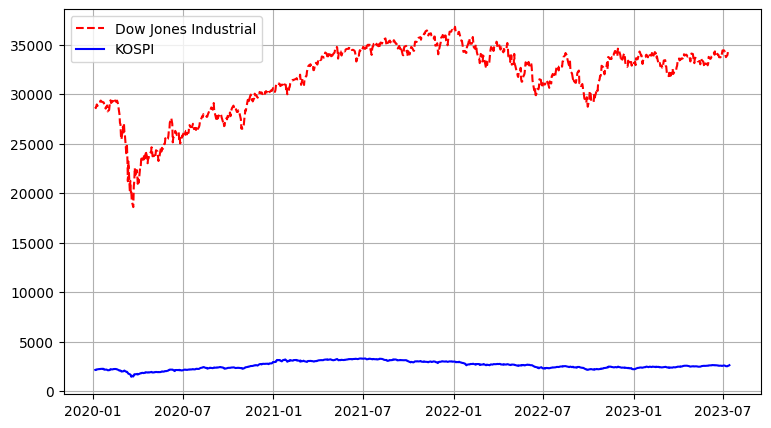

In [3]:
df = stock_index('2020-01-04')


import matplotlib.pyplot as plt
plt.figure(figsize=(9,5))
plt.plot(df.index, df['dow'], 'r--', label = 'Dow Jones Industrial')
plt.plot(df.index, df['kospi'], 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [4]:
import FinanceDataReader as fdr
df_krx = fdr.StockListing('KRX')

In [5]:
df_krx

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,73400,1,1500,2.09,72500,73400,72400,15882519,1159932414471,438182039170000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,542000,3,0,0.00,544000,546000,538000,324259,175229212000,126828000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,118000,1,3900,3.42,115500,120200,115300,5817889,687446848948,85904279070000,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,744000,2,-4000,-0.53,751000,751000,739000,64488,47911391000,52953456000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,60300,1,400,0.67,60000,60300,59800,1075298,64690797770,49620068010000,822886700,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2730,308700,KR7308700004,테크엔,KONEX,일반기업부,261,2,-36,-12.12,298,300,261,132,34528,1044000000,4000000,KNX
2731,010145,KR7010141000,삼성중공우,KOSPI,,6580,2,-10220,-60.83,10820,10900,6580,87288,694552420,755680100,114845,STK
2732,004565,KR7004561007,현대비앤지스틸우,KOSPI,,4910,2,-1610,-24.69,4570,5000,4570,55783,259132800,539373320,109852,STK
2733,000547,KR7000542001,흥국화재2우B,KOSPI,,3180,2,-620,-16.32,2970,3370,2970,66715,201993955,488448000,153600,STK


 1.2) CPI - 미국 소비자 물가지수
- 미국소비자물가지수(CPI)는 미국 고용통계국에서 매월 발표하는 지수로써, 미국 전체 및 세부 지역 별로 소비재 및 서비스 시장에 대해 도시 소비자가 지불하는 가격의 시간 경과에 따른 평균 변화를 측정한 것. 
- 소비자물가지수가 상승할 경우 가계의 실질임금은 감소한다는 의미로서, 이플레이션의 변동을 측정하는 중요한 지수로 판단할 수 있다.

1.3) 금리 지표 크롤링
- 91일 CD금리
- 콜금리
- 국고채
- 회사채
- 참고링크 : https://blog.naver.com/PostView.nhn?blogId=koko8624&logNo=221292348073&parentCategoryNo=&categoryNo=18&viewDate=&isShowPopularPosts=true&from=search

In [6]:
import requests as re
from bs4 import BeautifulSoup
import pandas as pd
from pandas import DataFrame, Series
import requests as re
from bs4 import BeautifulSoup

url = 'http://finance.naver.com/marketindex/interestDailyQuote.nhn?marketindexCd=IRR_CD91&page=1'

crawling_list = ['IRR_CALL',]

#폴더 위치를 입력해주세요
# folder_adress = 'C:/Users/kk/......'

def crawling_interest_rates():
    data_dict = {'IRR_CD91':[],
                 'IRR_CALL':[],
                 'IRR_GOVT03Y':[],
                 'IRR_CORP03Y':[]}

    label_list = ['IRR_CD91','IRR_CALL','IRR_GOVT03Y','IRR_CORP03Y']

    Data = DataFrame()
    
    for label in label_list:
    
        date_list = []
        
        try:
            for i in range(1,171): # 171쪽에 2018년이 시작되므로.
                url = re.get('http://finance.naver.com/marketindex/interestDailyQuote.nhn?marketindexCd=%s&page=%s'%(label,i))
                url = url.content
        
                soup = BeautifulSoup(url,'html.parser')
        
                # 날짜 가져오기
                dates = soup.select('tr > td.date')
            
            
                # 빈페이지인지 테스트
                try:
                    test = soup.find('tbody').find('tr').find('td',{'class':'num'}).text # .text가 에러를 반환하는가?
                except:
                    break
            
            
                # 처음 한번만 가져오자
                for date in dates:
                    date_list.append(date.text.strip())
                    
                                        
        
                rates = soup.find('tbody').find_all('tr')
        
                for rate in rates:
                    data_dict[label].append(rate.find('td',{'class':'num'}).text.strip())
            
        except:
            print('Error')
        
        temp_dataframe = DataFrame(data_dict[label], index = date_list)
        Data = pd.merge(Data,temp_dataframe,how = 'outer', left_index = True, right_index = True)
        
        print(label + '의 자료를 성공적으로 가져왔습니다')
    
    Data.columns = ['CD91일', '콜 금리', '국고채 3년', '회사채 3년']
    # Data.to_csv('%s/interest_rate.csv')
    return Data

금리 = crawling_interest_rates()



IRR_CD91의 자료를 성공적으로 가져왔습니다
IRR_CALL의 자료를 성공적으로 가져왔습니다
IRR_GOVT03Y의 자료를 성공적으로 가져왔습니다


MergeError: Passing 'suffixes' which cause duplicate columns {'0_x'} is not allowed.

In [7]:
Data

NameError: name 'Data' is not defined

### 1.3) 주간 실업수당 청구 건수(ICSA)


In [3]:
df

""
